In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [14]:
!pip -q install sastrawi

In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
import pickle

In [17]:
data = pd.read_csv('reviews.csv')
data.head()

,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
0,100002528,beli-harddisk-eksternal,Kamal U.,5,NaN,NaN,bagus mantap dah sesui pesanan,0,0,0,True,26.51,9-Apr-19,androidApp,10/2/2019
1,100002528,beli-harddisk-eksternal,yofanca m.,4,NaN,NaN,"Bagus, sesuai foto",0,0,0,True,22.49,24-Sep-17,androidApp,10/2/2019
2,100002528,beli-harddisk-eksternal,Lazada Customer,5,NaN,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,True,21.50,4-Apr-18,androidApp,10/2/2019
3,100002528,beli-harddisk-eksternal,Lazada Customer,4,NaN,NaN,bagus sesuai,0,0,0,True,20.51,22-Sep-17,androidApp,10/2/2019
4,100002528,beli-harddisk-eksternal,Yosep M.,5,NaN,NaN,NaN,0,0,0,True,16.01,17 Agu 2018,androidApp,10/2/2019


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   itemId          5000 non-null   int64  
 1   category        5000 non-null   object 
 2   name            5000 non-null   object 
 3   rating          5000 non-null   int64  
 4   originalRating  0 non-null      float64
 5   reviewTitle     1386 non-null   object 
 6   reviewContent   2436 non-null   object 
 7   likeCount       5000 non-null   int64  
 8   upVotes         5000 non-null   int64  
 9   downVotes       5000 non-null   int64  
 10  helpful         5000 non-null   bool   
 11  relevanceScore  5000 non-null   float64
 12  boughtDate      4589 non-null   object 
 13  clientType      5000 non-null   object 
 14  retrievedDate   5000 non-null   object 
dtypes: bool(1), float64(2), int64(5), object(7)
memory usage: 551.9+ KB


In [19]:
data.isnull().sum()

itemId               0
category             0
name                 0
rating               0
originalRating    5000
reviewTitle       3614
reviewContent     2564
likeCount            0
upVotes              0
downVotes            0
helpful              0
relevanceScore       0
boughtDate         411
clientType           0
retrievedDate        0
dtype: int64

In [20]:
data.loc[data['reviewContent'].isnull(),'reviewContent']= data['reviewTitle']
data

,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
0,100002528,beli-harddisk-eksternal,Kamal U.,5,NaN,NaN,bagus mantap dah sesui pesanan,0,0,0,True,26.51,9-Apr-19,androidApp,10/2/2019
1,100002528,beli-harddisk-eksternal,yofanca m.,4,NaN,NaN,"Bagus, sesuai foto",0,0,0,True,22.49,24-Sep-17,androidApp,10/2/2019
2,100002528,beli-harddisk-eksternal,Lazada Customer,5,NaN,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,True,21.50,4-Apr-18,androidApp,10/2/2019
3,100002528,beli-harddisk-eksternal,Lazada Customer,4,NaN,NaN,bagus sesuai,0,0,0,True,20.51,22-Sep-17,androidApp,10/2/2019
4,100002528,beli-harddisk-eksternal,Yosep M.,5,NaN,NaN,NaN,0,0,0,True,16.01,17 Agu 2018,androidApp,10/2/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,110295757,beli-harddisk-eksternal,Priyo S.,5,NaN,NaN,"Terimakasih Lazada, pengiriman cepat dan produ...",0,0,0,True,25.51,27-Mar-19,mobile,10/2/2019
4996,110295757,beli-harddisk-eksternal,Musclefit. I.,5,NaN,NaN,"pengririman cepat, barang berfungsi, smoga awe...",0,0,0,True,25.51,15-Mar-19,androidApp,10/2/2019
4997,110295757,beli-harddisk-eksternal,fairuz A.,5,NaN,NaN,"Barang original, pengiriman cepat",0,0,0,True,25.51,22-Feb-19,androidApp,10/2/2019
4998,110295757,beli-harddisk-eksternal,Catarina S.,5,NaN,NaN,nice,0,0,0,True,25.33,21 Agu 2019,androidApp,10/2/2019


In [21]:
data= data.dropna(axis=0, subset=['reviewContent'])
data

,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
0,100002528,beli-harddisk-eksternal,Kamal U.,5,NaN,NaN,bagus mantap dah sesui pesanan,0,0,0,True,26.51,9-Apr-19,androidApp,10/2/2019
1,100002528,beli-harddisk-eksternal,yofanca m.,4,NaN,NaN,"Bagus, sesuai foto",0,0,0,True,22.49,24-Sep-17,androidApp,10/2/2019
2,100002528,beli-harddisk-eksternal,Lazada Customer,5,NaN,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,True,21.50,4-Apr-18,androidApp,10/2/2019
3,100002528,beli-harddisk-eksternal,Lazada Customer,4,NaN,NaN,bagus sesuai,0,0,0,True,20.51,22-Sep-17,androidApp,10/2/2019
7,100002528,beli-harddisk-eksternal,nurfarida,1,NaN,ada pengirimn ntb bima,bima,4,4,0,True,7.22,NaN,androidApp,10/2/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,110295757,beli-harddisk-eksternal,Lazada Customer,3,NaN,NaN,Lumayan,0,0,0,True,26.17,27 Agu 2019,androidApp,10/2/2019
4995,110295757,beli-harddisk-eksternal,Priyo S.,5,NaN,NaN,"Terimakasih Lazada, pengiriman cepat dan produ...",0,0,0,True,25.51,27-Mar-19,mobile,10/2/2019
4996,110295757,beli-harddisk-eksternal,Musclefit. I.,5,NaN,NaN,"pengririman cepat, barang berfungsi, smoga awe...",0,0,0,True,25.51,15-Mar-19,androidApp,10/2/2019
4997,110295757,beli-harddisk-eksternal,fairuz A.,5,NaN,NaN,"Barang original, pengiriman cepat",0,0,0,True,25.51,22-Feb-19,androidApp,10/2/2019


In [22]:
data.isnull().sum()

itemId               0
category             0
name                 0
rating               0
originalRating    2624
reviewTitle       1238
reviewContent        0
likeCount            0
upVotes              0
downVotes            0
helpful              0
relevanceScore       0
boughtDate         405
clientType           0
retrievedDate        0
dtype: int64

# Pre Processing

## Casefolding

In [23]:
import re

# Buat fungsi untuk melakukan case folding
def casefolding(text):
  text = text.lower()                                 # Ubah jadi lowercase
  text = re.sub(r'https?://\S+|www\.\S+', '', text)   # Menghapus URL
  text = re.sub(r'[-+]?[0-9]+', '', text)             # Menghapus karakter angka
  text = re.sub(r'[^\w\s]', '', text)                 # Menghapus karakter tanda baca
  text = text.strip()
  return text

## Word Normalization

In [24]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=51e7619f33851f382bef7bf20dd6605fdcc9e01ab7e64555ad36e3c07b594281
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [25]:
import wget

url = 'https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv'

wget.download(url,'key_norm.csv')

'key_norm (1).csv'

In [26]:
key_norm = pd.read_csv('key_norm.csv')

# Buat fungsi untuk melakukan word normalization
def text_normalize(text):
  text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text.split()])
  text = str.lower(text)
  return text

## Filtering

In [27]:
from nltk.corpus import stopwords

stopwords_id = stopwords.words('indonesian')

In [28]:
# Buat fungsi untuk langkah stopwords removal

def remove_stopwords(text):
  clean_word = []
  all_text = text.split()
  for word in all_text:
    if word not in stopwords_id:
      clean_word.append(word)
  return ' '.join(clean_word)

## Stemming

In [29]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Buat fungsi untuk langkah stemming Bahasa Indonesia
def stemming(text):
  text = stemmer.stem(text)
  return text

# Text Preprocessing Pipeline

In [30]:
def text_preprocessing_process(text):
  text = casefolding(text)
  text = text_normalize(text)
  text = remove_stopwords(text)
  text = stemming(text)
  return text

In [31]:
%%time
data['clean_reviewContent'] = data['reviewContent'].apply(text_preprocessing_process)

CPU times: user 6min, sys: 1.12 s, total: 6min 2s
Wall time: 6min 11s


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
data

,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate,clean_reviewContent
0,100002528,beli-harddisk-eksternal,Kamal U.,5,NaN,NaN,bagus mantap dah sesui pesanan,0,0,0,True,26.51,9-Apr-19,androidApp,10/2/2019,bagus mantap sesui pesan
1,100002528,beli-harddisk-eksternal,yofanca m.,4,NaN,NaN,"Bagus, sesuai foto",0,0,0,True,22.49,24-Sep-17,androidApp,10/2/2019,bagus sesuai foto
2,100002528,beli-harddisk-eksternal,Lazada Customer,5,NaN,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,True,21.50,4-Apr-18,androidApp,10/2/2019,okkkkk mantaaaaaaapppp goood
3,100002528,beli-harddisk-eksternal,Lazada Customer,4,NaN,NaN,bagus sesuai,0,0,0,True,20.51,22-Sep-17,androidApp,10/2/2019,bagus sesuai
7,100002528,beli-harddisk-eksternal,nurfarida,1,NaN,ada pengirimn ntb bima,bima,4,4,0,True,7.22,NaN,androidApp,10/2/2019,bima
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,110295757,beli-harddisk-eksternal,Lazada Customer,3,NaN,NaN,Lumayan,0,0,0,True,26.17,27 Agu 2019,androidApp,10/2/2019,lumayan
4995,110295757,beli-harddisk-eksternal,Priyo S.,5,NaN,NaN,"Terimakasih Lazada, pengiriman cepat dan produ...",0,0,0,True,25.51,27-Mar-19,mobile,10/2/2019,terimakasih lazada kirim cepat produk real ses...
4996,110295757,beli-harddisk-eksternal,Musclefit. I.,5,NaN,NaN,"pengririman cepat, barang berfungsi, smoga awe...",0,0,0,True,25.51,15-Mar-19,androidApp,10/2/2019,pengririman cepat barang fungsi moga awet
4997,110295757,beli-harddisk-eksternal,fairuz A.,5,NaN,NaN,"Barang original, pengiriman cepat",0,0,0,True,25.51,22-Feb-19,androidApp,10/2/2019,barang original kirim cepat


In [33]:
from google.colab import files
data.to_csv('cleandata.csv') 
files.download('cleandata.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
data = pd.read_csv('cleandata.csv')

In [35]:
data['rating'].unique()

array([5, 4, 1, 3, 2])

In [36]:
rows= data[~data['rating'].isnull()]

In [37]:
rows= rows[~rows['clean_reviewContent'].isnull()]

In [38]:
rows

,Unnamed: 0,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate,clean_reviewContent
0,0,100002528,beli-harddisk-eksternal,Kamal U.,5,NaN,NaN,bagus mantap dah sesui pesanan,0,0,0,True,26.51,9-Apr-19,androidApp,10/2/2019,bagus mantap sesui pesan
1,1,100002528,beli-harddisk-eksternal,yofanca m.,4,NaN,NaN,"Bagus, sesuai foto",0,0,0,True,22.49,24-Sep-17,androidApp,10/2/2019,bagus sesuai foto
2,2,100002528,beli-harddisk-eksternal,Lazada Customer,5,NaN,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,True,21.50,4-Apr-18,androidApp,10/2/2019,okkkkk mantaaaaaaapppp goood
3,3,100002528,beli-harddisk-eksternal,Lazada Customer,4,NaN,NaN,bagus sesuai,0,0,0,True,20.51,22-Sep-17,androidApp,10/2/2019,bagus sesuai
4,7,100002528,beli-harddisk-eksternal,nurfarida,1,NaN,ada pengirimn ntb bima,bima,4,4,0,True,7.22,NaN,androidApp,10/2/2019,bima
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2619,4994,110295757,beli-harddisk-eksternal,Lazada Customer,3,NaN,NaN,Lumayan,0,0,0,True,26.17,27 Agu 2019,androidApp,10/2/2019,lumayan
2620,4995,110295757,beli-harddisk-eksternal,Priyo S.,5,NaN,NaN,"Terimakasih Lazada, pengiriman cepat dan produ...",0,0,0,True,25.51,27-Mar-19,mobile,10/2/2019,terimakasih lazada kirim cepat produk real ses...
2621,4996,110295757,beli-harddisk-eksternal,Musclefit. I.,5,NaN,NaN,"pengririman cepat, barang berfungsi, smoga awe...",0,0,0,True,25.51,15-Mar-19,androidApp,10/2/2019,pengririman cepat barang fungsi moga awet
2622,4997,110295757,beli-harddisk-eksternal,fairuz A.,5,NaN,NaN,"Barang original, pengiriman cepat",0,0,0,True,25.51,22-Feb-19,androidApp,10/2/2019,barang original kirim cepat


# Feature Engineering

In [39]:
# Pisahkan kolom feature dan target
X = rows[rows['clean_reviewContent'].notna()]
y = rows['rating']

In [40]:
X = X.clean_reviewContent

In [41]:
X

0                                bagus mantap sesui pesan
1                                       bagus sesuai foto
2                            okkkkk mantaaaaaaapppp goood
3                                            bagus sesuai
4                                                    bima
                              ...                        
2619                                              lumayan
2620    terimakasih lazada kirim cepat produk real ses...
2621            pengririman cepat barang fungsi moga awet
2622                          barang original kirim cepat
2623                                                 nice
Name: clean_reviewContent, Length: 2609, dtype: object

In [42]:
y

0       5
1       4
2       5
3       4
4       1
       ..
2619    3
2620    5
2621    5
2622    5
2623    5
Name: rating, Length: 2609, dtype: int64

## Feature Extraction (Bag of Words & N-Gram)
Proses mengubah teks menjadi bentuk vektor menggunakan metode BoW

In [43]:
'''
Convert a collection of text documents to a matrix of token counts.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
'''

from sklearn.feature_extraction.text import CountVectorizer
#BoW
bow= CountVectorizer(ngram_range=(1,1))
bow.fit(X)

CountVectorizer()

In [44]:
# Melihat jumlah token / fitur yang dihasilkan Bag of Words
len(bow.get_feature_names_out())

2831

In [45]:
# Melihat fitur-fitur apa saja yang ada dalam korpus
bow.get_feature_names_out()

array(['abal', 'abang', 'acara', ..., 'zada', 'zeb', 'zenfone'],
      dtype=object)

In [46]:
# Melihat matriks jumlah token
# Hasil ini, siap dimasukkan (di fit kan) dalam proses modelling (machine learning)

X_bow = bow.transform(X).toarray()
X_bow

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [47]:
data_bow = pd.DataFrame(X_bow, columns=bow.get_feature_names_out())
data_bow

,abal,abang,acara,aceh,ada,adaada,adados,adahanya,adapter,adapternya,...,yampe,yangbbelum,yanpa,yapersyaratan,yaseller,yey,youtube,zada,zeb,zenfone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2604,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2605,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2606,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2607,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# Simpan objek dari hasil bag of words
with open('hasil_bow.pickle', 'wb') as ouput:
  pickle.dump(X_bow, ouput)

## Feature Extraction (TF-IDF & N-Gram)
Proses mengubah teks menjadi bentuk vektor menggunakan metode TF-IDF

In [49]:
'''
Convert a collection of raw documents to a matrix of TF-IDF features.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
'''

from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(ngram_range=(1,1))
tf_idf.fit(X)

X_tf_idf = tf_idf.transform(X)

In [50]:
# Melihat jumlah token / fitur yang dihasilkan TF-IDF
len(tf_idf.get_feature_names_out())

2831

In [51]:
# Melihat fitur-fitur apa saja yang ada dalam korpus
tf_idf.get_feature_names_out()

array(['abal', 'abang', 'acara', ..., 'zada', 'zeb', 'zenfone'],
      dtype=object)

In [52]:
# Melihat matriks token menggunakan TF-IDF, lihat perbandingannya dengan metode BoW
# Sama halnya dengan BoW, data ini siap dimasukkan ke proses modelling

X_tf_idf = tf_idf.transform(X).toarray()
X_tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [53]:
data_tf_idf = pd.DataFrame(X_tf_idf, columns=tf_idf.get_feature_names_out())
data_tf_idf

,abal,abang,acara,aceh,ada,adaada,adados,adahanya,adapter,adapternya,...,yampe,yangbbelum,yanpa,yapersyaratan,yaseller,yey,youtube,zada,zeb,zenfone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
data_tf_idf.iloc[10:20,60:70]

,allah,alngkah,aluminium,alumunium,aman,amanah,amanbaik,amanbeneran,amandan,amanmatur
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
# Simpan objek dari hasil TF-IDF
with open('hasil_tf_idf.pickle', 'wb') as ouput:
  pickle.dump(X_tf_idf, ouput)

## Feature Selection

In [56]:
# Mengubah nilai data tabular tf-idf menjadi array agar dapat dijalankan pada proses seleksi fitur
X = np.array(data_tf_idf)
y = np.array(y)

In [57]:
'''
Select features according to the k highest scores.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

Compute chi-squared stats between each non-negative feature and class.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html
'''

from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 

# K features with highest chi-squared statistics are selected 
chi2_features = SelectKBest(chi2, k=1000) 
X_kbest_features = chi2_features.fit_transform(X, y) 
  
# Reduced features 
print('Original feature number:', X.shape[1]) 
print('Reduced feature number:', X_kbest_features.shape[1]) 

Original feature number: 2831
Reduced feature number: 1000


In [58]:
# chi2_features.scores_ adalah nilai chi-square, semakin tinggi nilainya maka semakin baik fiturnya
data_chi2 = pd.DataFrame(chi2_features.scores_, columns=['nilai'])
data_chi2

,nilai
0,2.447952
1,2.514483
2,0.198060
3,2.554441
4,0.217813
...,...
2826,0.159872
2827,4.290129
2828,0.209366
2829,0.195845


In [59]:
# Menampilkan fitur beserta nilainya
feature = tf_idf.get_feature_names_out()
data_chi2['fitur'] = feature
data_chi2

,nilai,fitur
0,2.447952,abal
1,2.514483,abang
2,0.198060,acara
3,2.554441,aceh
4,0.217813,ada
...,...,...
2826,0.159872,yey
2827,4.290129,youtube
2828,0.209366,zada
2829,0.195845,zeb


In [60]:
# Mengurutkan fitur terbaik
data_chi2.sort_values(by='nilai', ascending=False)

,nilai,fitur
2812,45.589286,xxnnxif
843,41.761832,fragile
208,39.707496,bangetkirain
1213,35.375956,kecewa
2688,35.347590,tunjuk
...,...,...
1258,0.047337,kesel
2650,0.047337,tranfser
1920,0.047337,pemakaianhasil
2634,0.047337,tolol


In [61]:
# Menampilkan mask pada feature yang diseleksi
# False berarti fitur tidak terpilih dan True berarti fitur terpilih
mask = chi2_features.get_support()
mask

array([ True,  True, False, ..., False, False, False])

In [62]:
# Menampilkan fitur-fitur terpilih berdasarkan mask atau nilai tertinggi yang sudah dikalkulasi pada Chi-Square
new_feature = []
for bool, f in zip(mask, feature):
  if bool:
    new_feature.append(f)
  selected_feature = new_feature
selected_feature

['abal',
 'abang',
 'aceh',
 'adaada',
 'adahanya',
 'adapternya',
 'adatp',
 'adem',
 'admin',
 'afee',
 'agustus',
 'ah',
 'ajatolong',
 'ajj',
 'aju',
 'aktif',
 'aktivasinya',
 'akun',
 'alamat',
 'alas',
 'alat',
 'alesan',
 'alhmdlh',
 'alhmdlillah',
 'aman',
 'amanmatur',
 'amin',
 'ampas',
 'aneka',
 'angge',
 'antena',
 'anter',
 'antivirus',
 'antivirusnya',
 'ap',
 'apkah',
 'april',
 'aqua',
 'aquanya',
 'arah',
 'arduino',
 'aryo',
 'asalasalan',
 'asli',
 'aslialias',
 'aspal',
 'aspek',
 'atur',
 'aturany',
 'audio',
 'awet',
 'baca',
 'back',
 'bad',
 'bagis',
 'bagus',
 'bagusbarang',
 'baguskalo',
 'bagussss',
 'baguz',
 'bahagia',
 'bahan',
 'baik',
 'baikbonus',
 'bal',
 'balas',
 'balikin',
 'bandung',
 'bang',
 'bangat',
 'banget',
 'bangetbarang',
 'bangetkirain',
 'bangke',
 'bantu',
 'bantuany',
 'banyak',
 'banyaktapi',
 'barang',
 'barangny',
 'barangnyacma',
 'barangx',
 'barng',
 'baseus',
 'basic',
 'basics',
 'batal',
 'batalin',
 'baterai',
 'batrepowerb

In [63]:
# Menampilkan fitur-fitur yang sudah diseleksi 
# Beserta nilai vektornya pada keseluruhan data untuk dijalankan pada proses machine learning

# Hanya k fitur yang terpilih sesuai parameter k yang ditentukan sebelumnya

data_selected_feature = pd.DataFrame(X_kbest_features, columns=selected_feature)
data_selected_feature

,abal,abang,aceh,adaada,adahanya,adapternya,adatp,adem,admin,afee,...,xxnnxif,ya,yaa,yaaa,yacc,yah,yahut,yanpa,yapersyaratan,youtube
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
with open('best_feature_chi2.pickle', 'wb') as output:
  pickle.dump(X_kbest_features, output)

# WordCloud

In [65]:
# Import Library WordCloud. WordCloud digunakan untuk melihat secara visual kata-kata yang paling sering muncul.
# Import Library cv2 untuk mengolah gambar menjadi masking WordCloud

import cv2
from wordcloud import WordCloud

In [66]:
# Download gambar masking
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg

--2022-04-02 13:26:47--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34396 (34K) [image/jpeg]
Saving to: ‘cloud.jpg’

cloud.jpg           100%[===================>]  33.59K  --.-KB/s    in 0s      

2022-04-02 13:26:47 (98.7 MB/s) - ‘cloud.jpg’ saved [34396/34396]



In [67]:
originalImage = cv2.imread('cloud.jpg')
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
(thresh, cloud_mask) = cv2.threshold(grayImage, 100, 255, cv2.THRESH_BINARY)

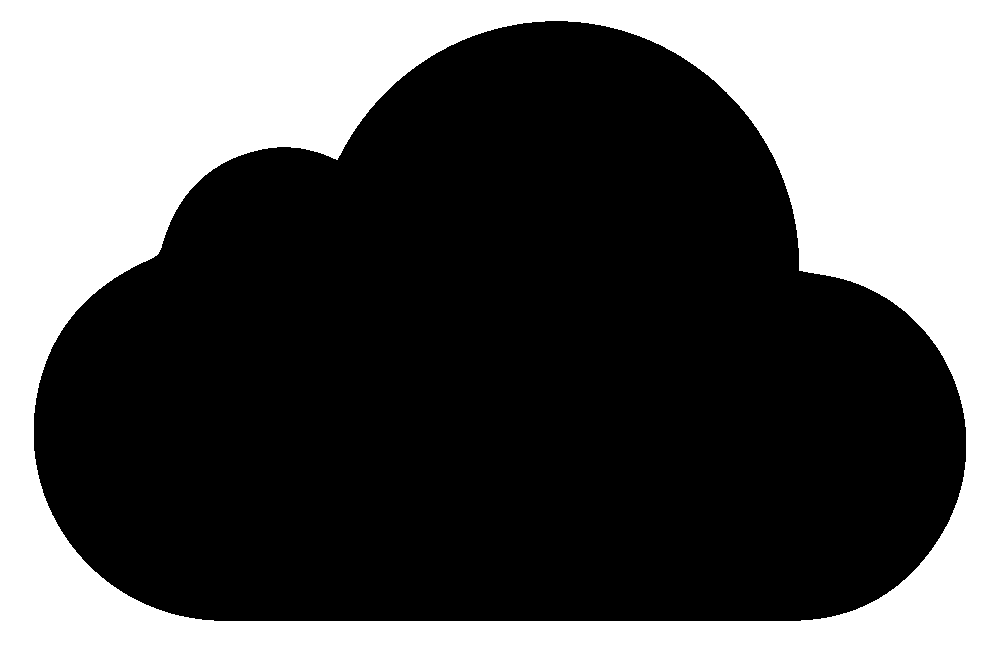

In [68]:
# Tampilkan masking
from google.colab.patches import cv2_imshow

cv2_imshow(cloud_mask)

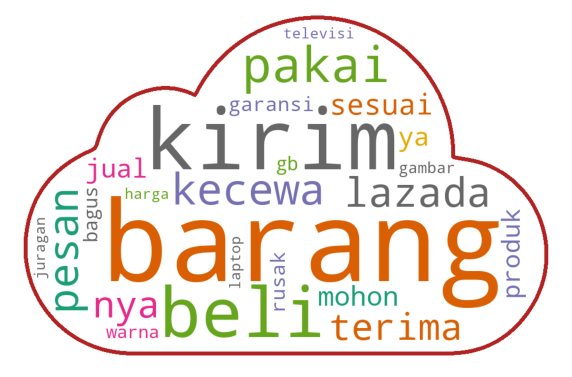

In [69]:
# WordCloud Label Rating 1

sms_normal = data[data.rating == 1]
normal_string = []

for t in sms_normal.clean_reviewContent:
  normal_string.append(t)

normal_string = pd.Series(normal_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

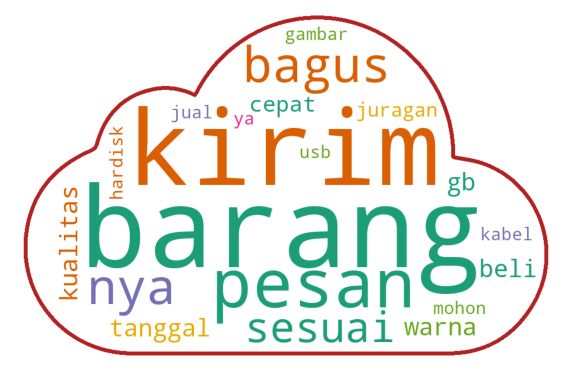

In [70]:
# WordCloud Label Rating 2

sms_normal = data[data.rating == 2]
normal_string = []

for t in sms_normal.clean_reviewContent:
  normal_string.append(t)

normal_string = pd.Series(normal_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

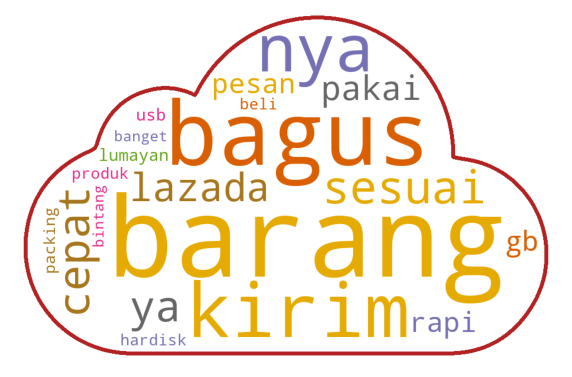

In [71]:
# WordCloud Label Rating 3

sms_normal = data[data.rating == 3]
normal_string = []

for t in sms_normal.clean_reviewContent:
  normal_string.append(t)

normal_string = pd.Series(normal_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

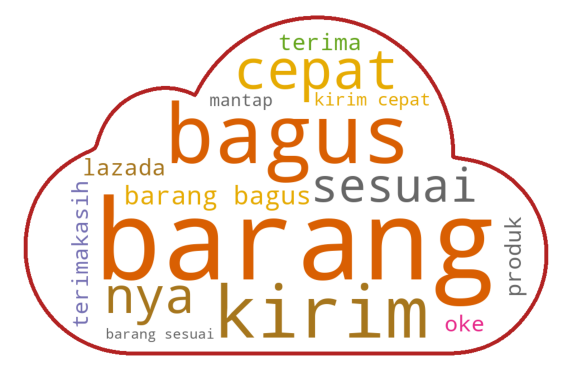

In [72]:
# WordCloud Label Rating 4

sms_normal = data[data.rating == 4]
normal_string = []

for t in sms_normal.clean_reviewContent:
  normal_string.append(t)

normal_string = pd.Series(normal_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

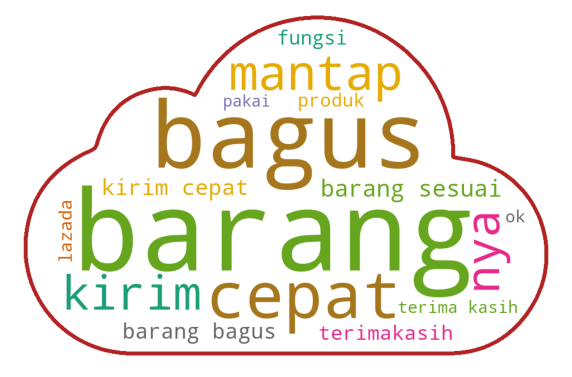

In [73]:
# WordCloud Label Rating 5

sms_normal = data[data.rating == 5]
normal_string = []

for t in sms_normal.clean_reviewContent:
  normal_string.append(t)

normal_string = pd.Series(normal_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()